In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import os

In [ ]:
dir_base = '/content/drive/MyDrive/Colab/Datasets/'

datasets = ['gtfsSP0810','gtfsSP0910','gtfsSP1010', 'gtfsSP1110', 'gtfsSP1410','gtfsSP1510','gtfsSP1610','gtfsSP1710','gtfsSP1810','gtfsSP2110','gtfsSP2210','gtfsSP2410','gtfsSP2510','gtfsSP2810','gtfsSP2910','gtfsSP3010','gtfsSP3110','gtfsSP0111','gtfsSP0411','gtfsSP0511','gtfsSP0811','gtfsSP1111','gtfsSP1211','gtfsSP1311','gtfsSP1411',]  # Aqui você pode adicionar todos os datasets que deseja juntar

output_dir = '/content/drive/MyDrive/Colab/Datasets/gtfsSP_consolidado/'

os.makedirs(output_dir, exist_ok=True)

arquivos_txt = ['frequencies.txt', 'trips.txt', 'routes.txt', 'stop_times.txt', 'stops.txt']

def combinar_arquivos_por_tipo(nome_arquivo):
    df_list = []

    for dataset in datasets:
        caminho_arquivo = os.path.join(dir_base, dataset, nome_arquivo)
        if os.path.exists(caminho_arquivo):
            df = pd.read_csv(caminho_arquivo, delimiter=',')
            df_list.append(df)
        else:
            print(f"Arquivo {nome_arquivo} não encontrado no dataset {dataset}")

    df_concatenado = pd.concat(df_list, ignore_index=True)
    return df_concatenado

for arquivo in arquivos_txt:
    df_consolidado = combinar_arquivos_por_tipo(arquivo)
    caminho_saida = os.path.join(output_dir, arquivo)

    df_consolidado.to_csv(caminho_saida, index=False)
    print(f"Arquivo consolidado salvo em: {caminho_saida}")



Arquivo consolidado salvo em: /content/drive/MyDrive/Colab/Datasets/gtfsSP_consolidado/frequencies.txt
Arquivo consolidado salvo em: /content/drive/MyDrive/Colab/Datasets/gtfsSP_consolidado/trips.txt
Arquivo consolidado salvo em: /content/drive/MyDrive/Colab/Datasets/gtfsSP_consolidado/routes.txt
Arquivo consolidado salvo em: /content/drive/MyDrive/Colab/Datasets/gtfsSP_consolidado/stop_times.txt
Arquivo consolidado salvo em: /content/drive/MyDrive/Colab/Datasets/gtfsSP_consolidado/stops.txt


In [ ]:
dir_consolidado = '/content/drive/MyDrive/Colab/gtfsSP_consolidado/'

frequencies = pd.read_csv(dir_consolidado +'frequencies.txt', delimiter=',')
trips = pd.read_csv(dir_consolidado +'trips.txt', delimiter=',')
routes = pd.read_csv(dir_consolidado +'routes.txt', delimiter=',')
stop_times = pd.read_csv(dir_consolidado + 'stop_times.txt',delimiter=',')
stops = pd.read_csv(dir_consolidado + 'stops.txt',delimiter=',')

# **Quais linhas de ônibus têm os maiores tempos de espera e quais são as mais pontuais?**

In [ ]:
print(frequencies.head)
print(trips.head)
print(routes.head)
print(len(stop_times))

<bound method NDFrame.head of            trip_id start_time  end_time  headway_secs
0        1012-10-0   00:00:00  00:59:00          1200
1        1012-10-0   01:00:00  01:59:00          3600
2        1012-10-0   05:00:00  05:59:00           420
3        1012-10-0   06:00:00  06:59:00           480
4        1012-10-0   07:00:00  07:59:00           600
...            ...        ...       ...           ...
1002353  N843-11-0   00:00:00  00:59:00          1800
1002354  N843-11-0   01:00:00  01:59:00          3600
1002355  N843-11-0   02:00:00  02:59:00          1800
1002356  N843-11-0   03:00:00  03:59:00          3600
1002357  N843-11-0   04:00:00  04:59:00          3600

[1002358 rows x 4 columns]>
<bound method NDFrame.head of       route_id service_id    trip_id         trip_headsign  direction_id  \
0      1012-10        USD  1012-10-0        Jd. Monte Belo             0   
1      1012-10        USD  1012-10-1    Term. Jd. Britania             1   
2      1012-21        U__  1012-21-

In [ ]:
datasets1 = [frequencies, trips, routes]
for dataset in datasets1:
    dataset.fillna('Não informado', inplace=True)

for name, dataset in zip(['frequencies', 'trips', 'routes'], datasets1):
    print(f"Valores nulos restantes no dataset {name}:")
    print(dataset.isnull().sum())

Valores nulos restantes no dataset frequencies:
trip_id         0
start_time      0
end_time        0
headway_secs    0
dtype: int64
Valores nulos restantes no dataset trips:
route_id         0
service_id       0
trip_id          0
trip_headsign    0
direction_id     0
shape_id         0
dtype: int64
Valores nulos restantes no dataset routes:
route_id            0
agency_id           0
route_short_name    0
route_long_name     0
route_type          0
route_color         0
route_text_color    0
dtype: int64


In [ ]:
tempo_medio_espera_trip = frequencies.groupby('trip_id')['headway_secs'].mean().reset_index()

tempo_medio_espera_linhas = pd.merge(tempo_medio_espera_trip, trips[['trip_id', 'route_id']], on='trip_id')

tempo_medio_espera_linhas = tempo_medio_espera_linhas.groupby('route_id')['headway_secs'].mean().reset_index()

linhas_tempo_espera = pd.merge(tempo_medio_espera_linhas, routes[['route_id', 'route_short_name', 'route_long_name']], on='route_id')

linhas_tempo_espera['headway_mins'] = linhas_tempo_espera['headway_secs'] / 60
linhas_tempo_espera['headway_hours'] = linhas_tempo_espera['headway_secs'] / 3600

print(linhas_tempo_espera[['route_short_name', 'route_long_name', 'headway_secs', 'headway_mins', 'headway_hours']].head())

  route_short_name                      route_long_name  headway_secs  \
0          1012-10  Term. Jd. Britania - Jd. Monte Belo    777.142857   
1          1012-10  Term. Jd. Britania - Jd. Monte Belo    777.142857   
2          1012-10  Term. Jd. Britania - Jd. Monte Belo    777.142857   
3          1012-10  Term. Jd. Britania - Jd. Monte Belo    777.142857   
4          1012-10  Term. Jd. Britania - Jd. Monte Belo    777.142857   

   headway_mins  headway_hours  
0     12.952381       0.215873  
1     12.952381       0.215873  
2     12.952381       0.215873  
3     12.952381       0.215873  
4     12.952381       0.215873  


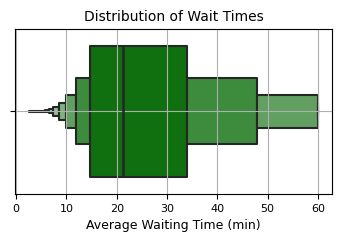

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ajuste de estilo e tamanhos de fonte
custom_rc = {
    'axes.titlesize': 10,
    'axes.labelsize': 9,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8
}
plt.rcParams.update(custom_rc)

# Garantir que a pasta de saída exista
output_dir = "figs_eps"
if not os.path.isdir(output_dir):
    os.mkdir(output_dir)

# Criar a figura do boxen plot
fig, ax = plt.subplots(figsize=(3.5, 2.5))
sns.boxenplot(
    data=linhas_tempo_espera,
    x='headway_mins',
    color='green',
    linewidth=1.5,
    ax=ax
)


ax.set_xlabel('Average Waiting Time (min)')
ax.set_title('Distribution of Wait Times')
ax.grid(visible=True)
fig.tight_layout(pad=1.0)

# Salvar no formato EPS
save_path = os.path.join(output_dir, "boxen_wait_time.eps")
fig.savefig(save_path, dpi=300, format="eps", bbox_inches="tight")



In [ ]:
print(len(linhas_tempo_espera))

32779


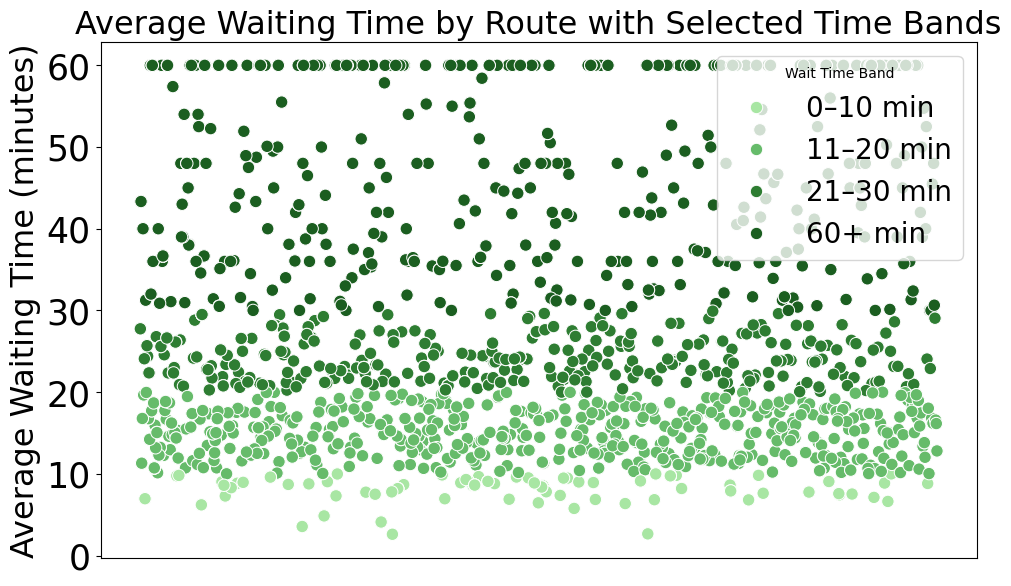

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo
style_params = {
    'axes.titlesize': 23,
    'axes.labelsize': 23,
    'xtick.labelsize': 7,
    'ytick.labelsize': 25,
    'legend.fontsize': 20
}
plt.rcParams.update(style_params)

# Definição de novas faixas de tempo
# Apenas 4 categorias → 5 bordas
intervalos = [0, 10, 20, 30, float('inf')]
faixas_rotulos = ['0-10', '11-20', '21-30', '60+']
faixas_traduzidas = {
    '0-10': '0–10 min',
    '11-20': '11–20 min',
    '21-30': '21–30 min',
    '60+': '60+ min'
}

linhas_tempo_espera = linhas_tempo_espera.copy()
linhas_tempo_espera['faixa_tempo'] = pd.cut(
    x=linhas_tempo_espera['headway_mins'],
    bins=intervalos,
    labels=faixas_rotulos,
    right=False
)


# Amostragem de 10%
dados_amostra = linhas_tempo_espera.sample(frac=0.1, random_state=0)

# Criar pasta de saída
saida_figuras = "figs_eps"
os.makedirs(saida_figuras, exist_ok=True)

# Paleta em tons de verde
cores_verde = ["#a8e6a3", "#66bb6a", "#2e7d32", "#1b5e20"]

# Criar figura
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    data=dados_amostra,
    x='route_short_name',
    y='headway_mins',
    hue='faixa_tempo',
    hue_order=faixas_rotulos,
    palette=cores_verde,
    s=80,
    ax=ax
)

# Ajustes do eixo e título
ax.set_xticks([])
ax.set_xlabel('')
ax.set_ylabel('Average Waiting Time (minutes)')
ax.set_title('Average Waiting Time by Route with Selected Time Bands')

# Legenda traduzida
handles, _ = ax.get_legend_handles_labels()
ax.legend(
    handles=handles,
    labels=[faixas_traduzidas[l] for l in faixas_rotulos],
    title='Wait Time Band'
)

# Salvar figura
caminho_saida = os.path.join(saida_figuras, "scatter_wait_route_green.eps")
fig.tight_layout(pad=1.2)
fig.savefig(caminho_saida, format="eps", dpi=600, bbox_inches="tight")



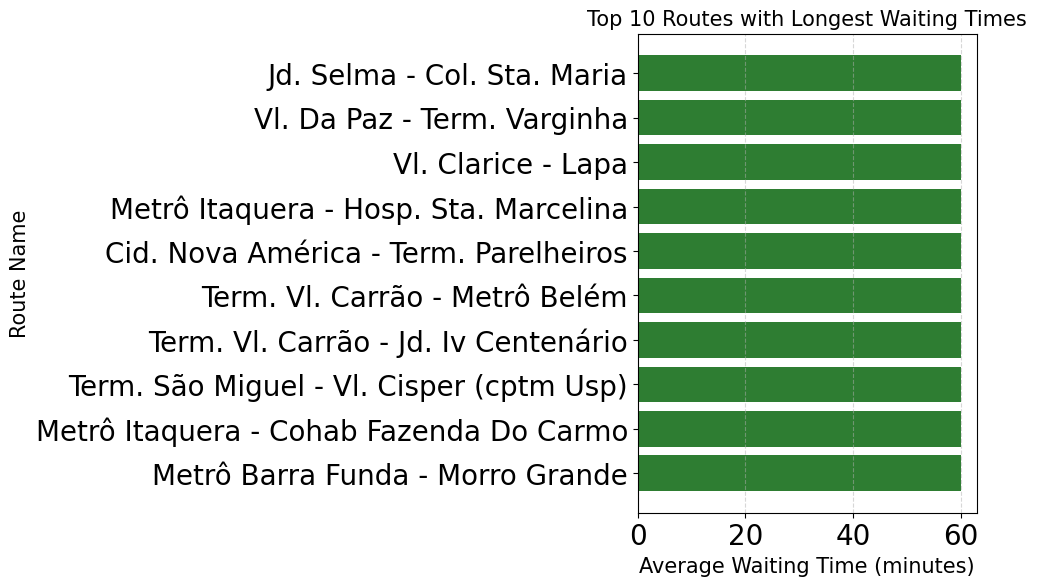

In [ ]:
import os
import matplotlib.pyplot as plt

# --- Agrupamento e seleção das 10 piores ---
top_10_maiores = (
    linhas_tempo_espera
    .groupby('route_long_name', as_index=False)
    .agg({'headway_mins': 'max'})
    .sort_values(by='headway_mins', ascending=False)
    .head(10)
)

# --- Configuração de estilo ---
plt.rcParams.update({
    'axes.titlesize': 15,
    'axes.labelsize': 15,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20
})

# --- Garantir pasta de saída ---
saida_dir = "figs_eps"
os.makedirs(saida_dir, exist_ok=True)

# --- Criação do gráfico ---
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(
    top_10_maiores['route_long_name'],
    top_10_maiores['headway_mins'],
    color="#2E7D32"  # verde escuro
)

# --- Ajustes visuais ---
ax.set_xlabel('Average Waiting Time (minutes)')
ax.set_ylabel('Route Name')
ax.set_title('Top 10 Routes with Longest Waiting Times')
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.5)  # grid leve para diferenciar visualmente

# --- Salvar saída ---
fig.tight_layout(pad=1.2)
fig.savefig(os.path.join(saida_dir, "barh_top10_longest_wait_green.eps"),
            format="eps", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
print(top_10_maiores['route_long_name'])

493                  Jd. Selma - Col. Sta. Maria
1085                 Vl. Da Paz - Term. Varginha
1079                          Vl. Clarice - Lapa
608        Metrô Itaquera - Hosp. Sta. Marcelina
77         Cid. Nova América - Term. Parelheiros
1037              Term. Vl. Carrão - Metrô Belém
1036        Term. Vl. Carrão - Jd. Iv Centenário
1022    Term. São Miguel - Vl. Cisper (cptm Usp)
607      Metrô Itaquera - Cohab Fazenda Do Carmo
592             Metrô Barra Funda - Morro Grande
Name: route_long_name, dtype: object


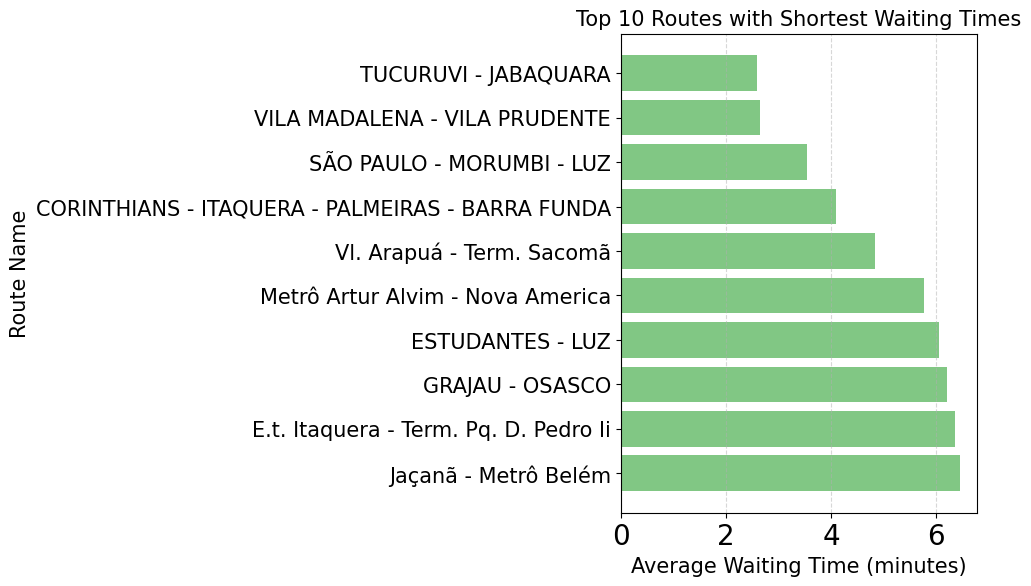

In [ ]:
import os
import matplotlib.pyplot as plt

# --- Agrupamento e ordenação (menores tempos) ---
top_10_menores = (
    linhas_tempo_espera
    .groupby('route_long_name', as_index=False)
    .agg({'headway_mins': 'min'})
    .sort_values(by='headway_mins', ascending=True)
    .head(10)
)

# --- Configuração de estilo ---
plt.rcParams.update({
    'axes.titlesize': 15,
    'axes.labelsize': 15,
    'xtick.labelsize': 20,
    'ytick.labelsize': 15
})

# --- Garantir diretório de saída ---
output_dir = "figs_eps"
os.makedirs(output_dir, exist_ok=True)

# --- Criação do gráfico ---
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(
    top_10_menores['route_long_name'],
    top_10_menores['headway_mins'],
    color="#81C784"  # Verde claro
)

# --- Ajustes visuais ---
ax.set_xlabel('Average Waiting Time (minutes)')
ax.set_ylabel('Route Name')
ax.set_title('Top 10 Routes with Shortest Waiting Times')
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.5)

# --- Salvar figura ---
fig.tight_layout(pad=1.2)
fig.savefig(os.path.join(output_dir, "barh_top10_shortest_wait_greenlight.eps"),
            format="eps", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
print(stop_times.head(0))
print(linhas_tempo_espera.head(0))

Empty DataFrame
Columns: [trip_id, arrival_time, departure_time, stop_id, stop_sequence]
Index: []
Empty DataFrame
Columns: [route_id, headway_secs, route_short_name, route_long_name, headway_mins, headway_hours, faixa_tempo]
Index: []


In [ ]:
linhas_com_trips = linhas_tempo_espera.merge(trips[['route_id', 'trip_id']], on='route_id', how='left')
linhas_com_trips_amostragem = linhas_com_trips.sample(frac=0.01, random_state=41)

print(linhas_com_trips_amostragem[['route_id', 'trip_id']].head())

        route_id    trip_id
500843   425E-10  425E-10-0
1320004  N304-11  N304-11-0
753111   6053-10  6053-10-1
626433   5175-10  5175-10-1
888215   6820-10  6820-10-1


In [ ]:
linhas_com_horarios = linhas_com_trips_amostragem.merge(stop_times[['trip_id', 'stop_id', 'arrival_time']], on='trip_id', how='left')

print(linhas_com_horarios[['trip_id', 'stop_id', 'arrival_time']].head())

     trip_id    stop_id arrival_time
0  425E-10-0  780006749     18:00:00
1  425E-10-0  780006804     18:01:58
2  425E-10-0  780006805     18:03:56
3  425E-10-0  780006806     18:05:54
4  425E-10-0  780006807     18:07:52


In [ ]:
print(len(linhas_com_horarios))

15281582


In [ ]:
linhas_com_horarios_amostradas = linhas_com_horarios.sample(frac=0.01, random_state=42)  # random_state para reprodutibilidade
print(len(linhas_com_horarios_amostradas))

152816


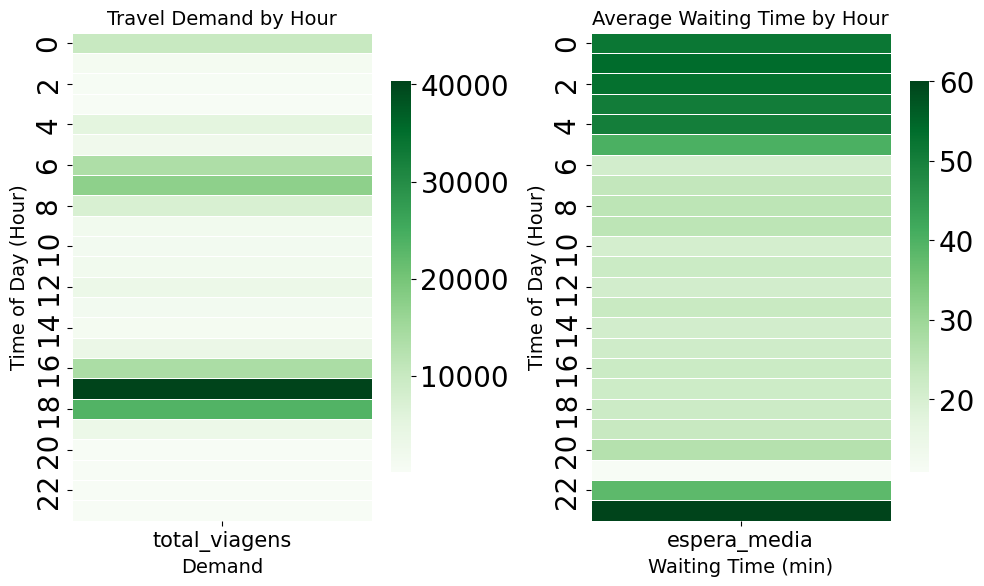

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Garantir diretório de saída ---
output_dir = "figs_eps"
os.makedirs(output_dir, exist_ok=True)

# --- Fonte e estilo ---
plt.rcParams.update({
    'axes.titlesize': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 15,
    'ytick.labelsize': 20
})

# --- Conversão para hora ---
dados_horarios = linhas_com_horarios_amostradas.copy()
dados_horarios['hora'] = pd.to_datetime(
    dados_horarios['arrival_time'],
    format='%H:%M:%S',
    errors='coerce'
).dt.hour

# --- Agregações ---
resumo_horas = (
    dados_horarios
    .groupby('hora')
    .agg(
        total_viagens=('hora', 'size'),
        espera_media=('headway_mins', 'mean')
    )
    .fillna(0)
    .sort_index()
)

# --- Criação dos heatmaps ---
fig, eixos = plt.subplots(1, 2, figsize=(10, 6))

# Mapa de demanda
sns.heatmap(
    resumo_horas[['total_viagens']],
    cmap='Greens',
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    ax=eixos[0]
)
eixos[0].set_title('Travel Demand by Hour')
eixos[0].set_ylabel('Time of Day (Hour)')
eixos[0].set_xlabel('Demand')

# Mapa de tempo de espera
sns.heatmap(
    resumo_horas[['espera_media']],
    cmap='Greens',
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    ax=eixos[1]
)
eixos[1].set_title('Average Waiting Time by Hour')
eixos[1].set_ylabel('Time of Day (Hour)')
eixos[1].set_xlabel('Waiting Time (min)')

# --- Ajustes e salvamento ---
plt.tight_layout(pad=1.2)
fig.savefig(
    os.path.join(output_dir, "heatmap_hour_demand_wait_green.eps"),
    format="eps", dpi=300, bbox_inches="tight"
)
plt.show()


# **Como a introdução de veículos autônomos poderia impactar os tempos de viagem e a frequência dos serviços?**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

caminho_arquivo = '/content/drive/MyDrive/Colab/secseg/OcorrenciaMensal(Criminal)-São Paulo_20241008_171533.csv'

df = pd.read_csv(caminho_arquivo, delimiter=';')

print("Colunas no DataFrame:", df.columns)

if 'Natureza' not in df.columns:
    raise ValueError("A coluna 'Natureza' não foi encontrada no DataFrame.")

dados_lesao_culposa = df[df['Natureza'] == 'LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO'].T.iloc[1:-1]

dados_lesao_culposa.columns = ['Quantidade']
dados_lesao_culposa.index.name = 'Meses'

Colunas no DataFrame: Index(['Natureza', 'Janeiro', 'Fevereiro', 'Marco', 'Abril', 'Maio', 'Junho',
       'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro',
       'Total'],
      dtype='object')


/tmp/ipython-input-2661477478.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2661477478.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipython-input-2661477478.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout(pad=1.2)


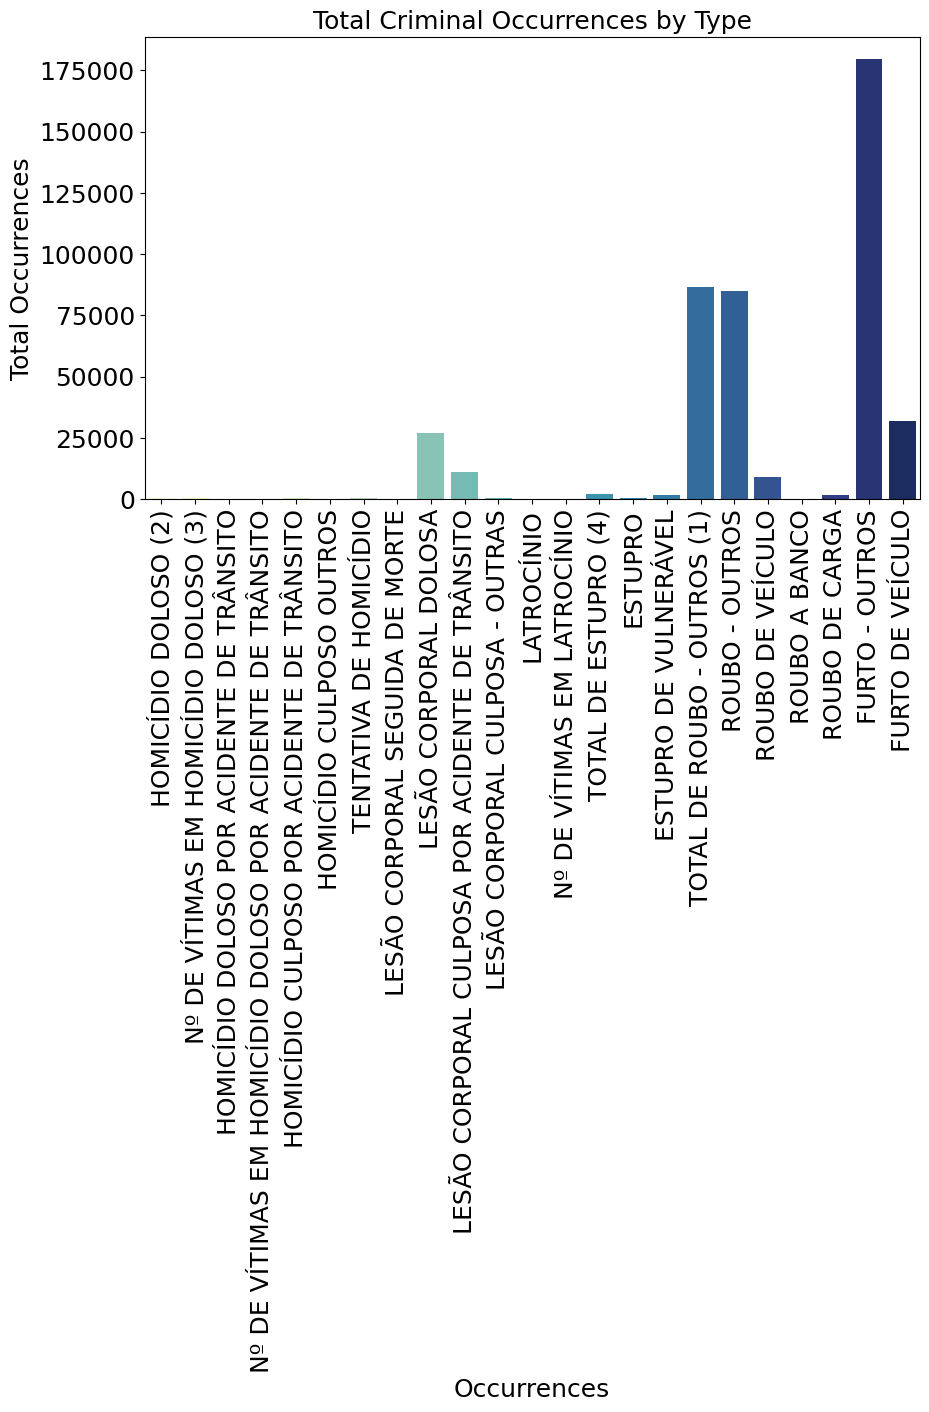

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Garantir diretório de saída ---
output_dir = "figs_eps"
os.makedirs(output_dir, exist_ok=True)

# --- Configuração visual ---
plt.rcParams.update({
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# --- Preparação dos dados ---
dados_ocorrencias = df[['Natureza', 'Total']].copy()
dados_ocorrencias['Total'] = pd.to_numeric(
    dados_ocorrencias['Total'],
    errors='coerce'
)

# --- Criação do gráfico ---
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=dados_ocorrencias,
    x='Natureza',
    y='Total',
    palette='YlGnBu',
    ax=ax
)

# --- Ajustes visuais ---
ax.set_xlabel('Occurrences')
ax.set_ylabel('Total Occurrences')
ax.set_title('Total Criminal Occurrences by Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# --- Salvar figura ---
fig.tight_layout(pad=1.2)
fig.savefig(
    os.path.join(output_dir, "bar_total_occurrences_blue.eps"),
    format="eps", dpi=300, bbox_inches="tight"
)
plt.show()


/tmp/ipython-input-648521312.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-648521312.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipython-input-648521312.py:69: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout(pad=1.2)


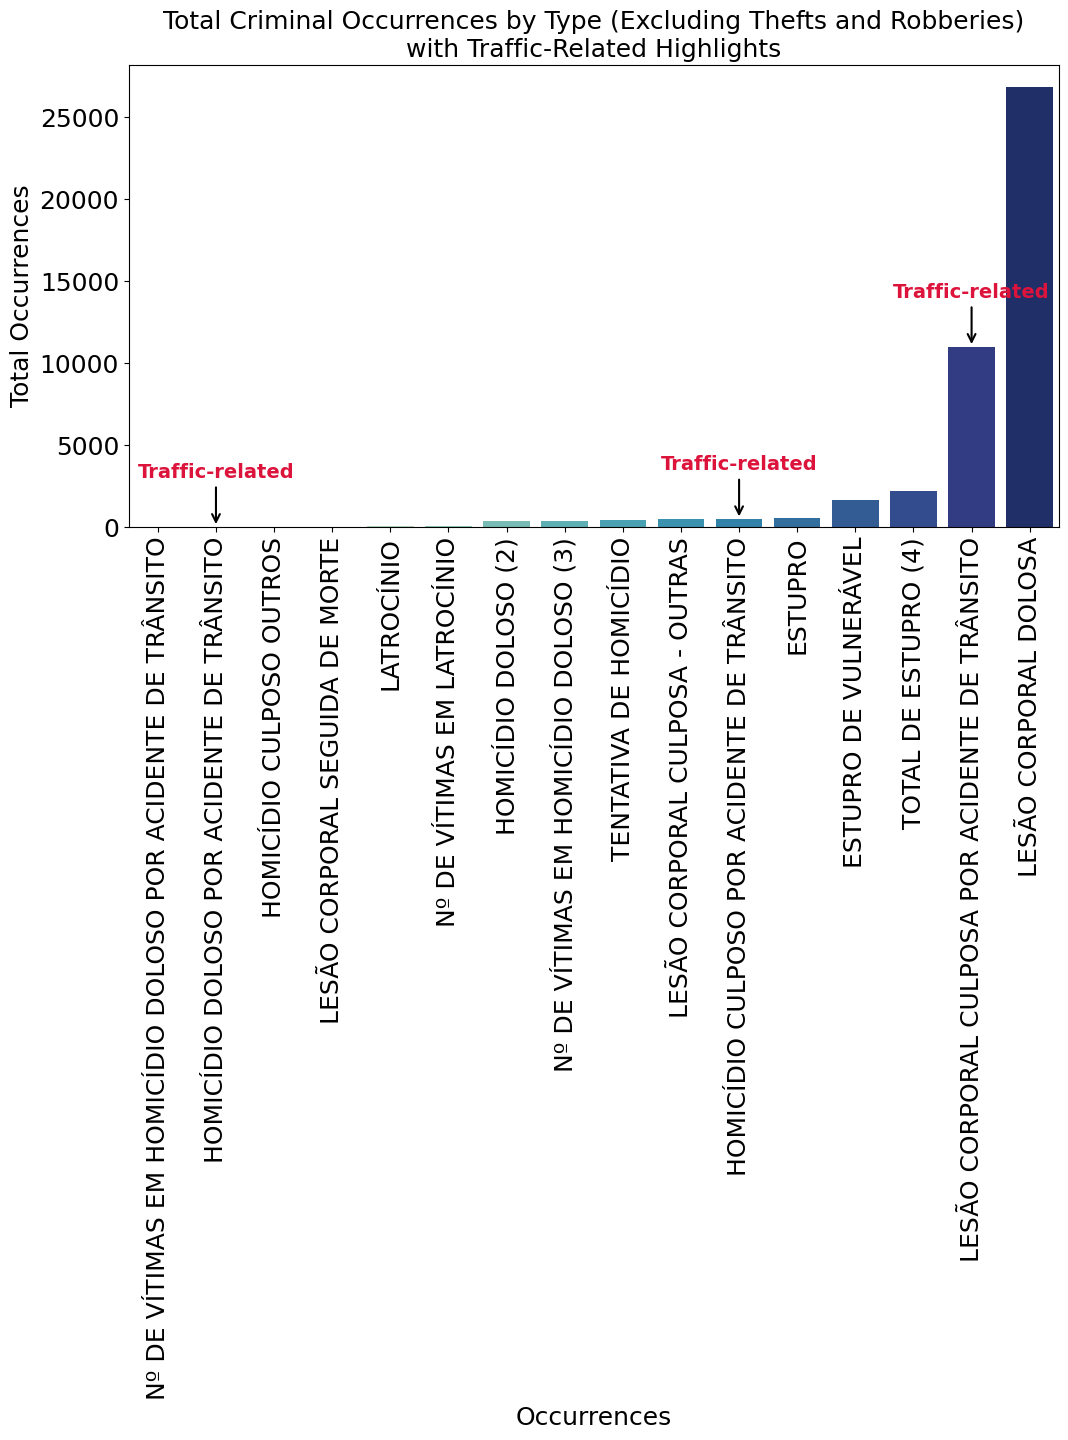

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter

# --- Garantir diretório ---
output_dir = "figs_eps"
os.makedirs(output_dir, exist_ok=True)

# --- Configuração visual ---
plt.rcParams.update({
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# --- Filtragem dos dados ---
totais_ocorrencias = df[~df['Natureza'].str.contains('FURTO|ROUBO', case=False, na=False)].copy()
totais_ocorrencias['Total'] = pd.to_numeric(totais_ocorrencias['Total'], errors='coerce')

# --- Ordena por valor para degradê consistente ---
totais_ocorrencias_sorted = totais_ocorrencias.sort_values('Total', ascending=True)

# --- Paleta YlGnBu ---
palette_custom = sns.color_palette("YlGnBu", n_colors=len(totais_ocorrencias_sorted))

# --- Lista de crimes de trânsito para destacar ---
highlight = [
    'HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO',
    'HOMICÍDIO CULPOSO POR ACIDENTE DE TRÂNSITO',
    'LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO'
]

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(
    data=totais_ocorrencias_sorted,
    x='Natureza',
    y='Total',
    palette=palette_custom,
    ax=ax
)

# --- Anotações para os crimes de trânsito ---
for i, row in enumerate(totais_ocorrencias_sorted.itertuples()):
    if row.Natureza in highlight:
        ax.annotate(
            "Traffic-related",
            xy=(i, row.Total),
            xytext=(i, row.Total + 3000),
            ha='center', color="crimson",
            fontsize=14, weight='bold',   # 👈 destaque maior
            arrowprops=dict(facecolor="crimson", arrowstyle="->", lw=1.5)
        )

# --- Formatação eixo Y ---
formatter = FuncFormatter(lambda x, _: f'{int(x/1000)}000' if x >= 1000 else int(x))
ax.yaxis.set_major_formatter(formatter)

# --- Ajustes visuais ---
ax.set_xlabel("Occurrences")
ax.set_ylabel("Total Occurrences")
ax.set_title("Total Criminal Occurrences by Type (Excluding Thefts and Robberies)\nwith Traffic-Related Highlights")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# --- Salvar ---
fig.tight_layout(pad=1.2)
fig.savefig(
    os.path.join(output_dir, "bar_occurrences_highlighted.eps"),
    format="eps", dpi=300, bbox_inches="tight"
)
plt.show()


/tmp/ipython-input-3076291094.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipython-input-3076291094.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


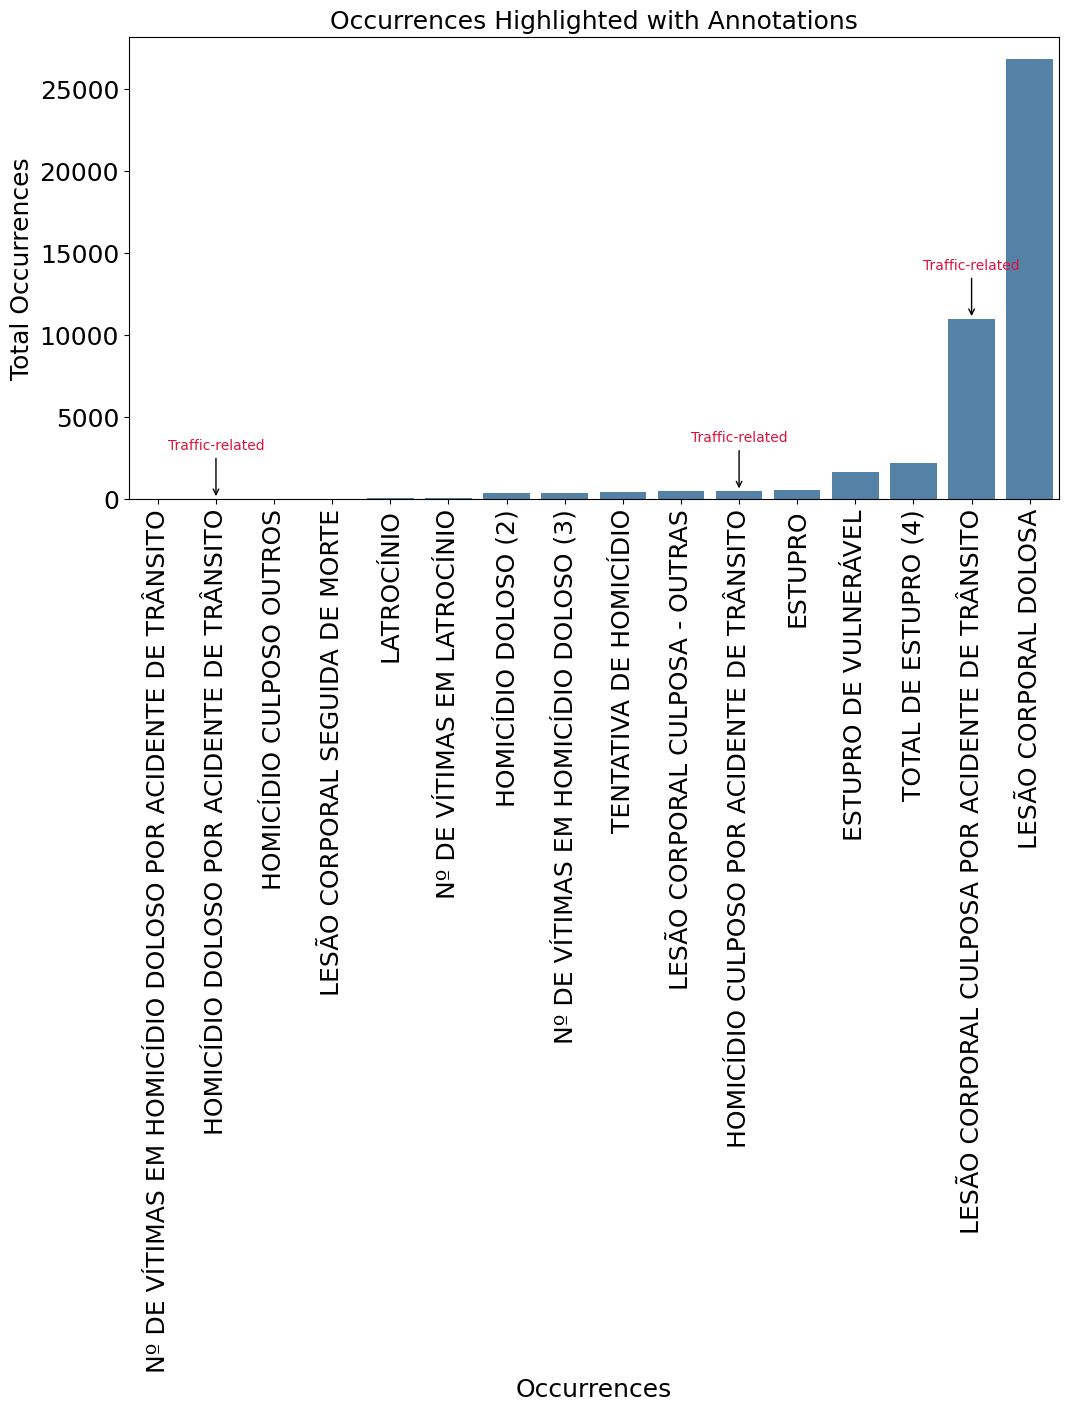

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=totais_ocorrencias_sorted, x='Natureza', y='Total', color="steelblue", ax=ax)

ax.set_title("Occurrences Highlighted with Annotations")
ax.set_xlabel("Occurrences")
ax.set_ylabel("Total Occurrences")

for i, row in enumerate(totais_ocorrencias_sorted.itertuples()):
    if row.Natureza in highlight:
        ax.annotate("Traffic-related",
                    xy=(i, row.Total),
                    xytext=(i, row.Total + 3000),
                    ha='center', color="crimson",
                    arrowprops=dict(facecolor="crimson", arrowstyle="->"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


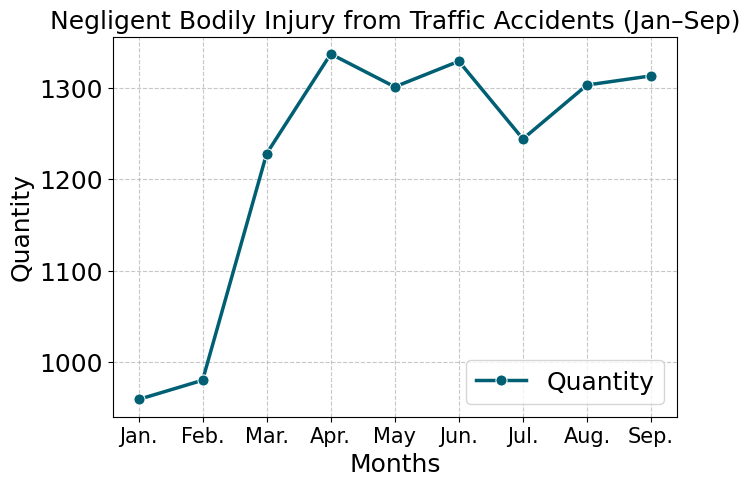

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# --- Garantir diretório ---
output_dir = "figs_eps"
os.makedirs(output_dir, exist_ok=True)

# --- Configuração visual ---
plt.rcParams.update({
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 15,
    'ytick.labelsize': 18,
    'legend.fontsize': 18
})

# --- Cor personalizada (azul petróleo) ---
cor_azul = ['#005f73']  # tom mais escuro e elegante
palette_personalizada = sns.color_palette(cor_azul)

# --- Filtra dados até setembro ---
dados_filtrados = dados_lesao_culposa.iloc[:9]

# --- Criação do gráfico ---
fig, ax = plt.subplots(figsize=(7, 5))
sns.lineplot(
    data=dados_filtrados,
    marker='o',               # troca marcador para círculo
    markersize=8,              # marcador maior
    palette=palette_personalizada,
    linewidth=2.5,             # linha mais espessa
    ax=ax
)

# --- Ajustes do eixo e título ---
ax.set_xlabel('Months')
ax.set_ylabel('Quantity')
ax.set_title('Negligent Bodily Injury from Traffic Accidents (Jan–Sep)')
ax.set_xticks(range(9))
ax.set_xticklabels(['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.'])

# --- Grid pontilhado para diferenciar ---
ax.grid(True, linestyle='--', alpha=0.7)

# --- Ajuste da legenda ---
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Quantity'], title='')

# --- Salvar ---
fig.tight_layout(pad=1.2)
fig.savefig(
    os.path.join(output_dir, "line_negligent_injury_jan_sep_blue.eps"),
    format="eps", dpi=300, bbox_inches="tight"
)
plt.show()


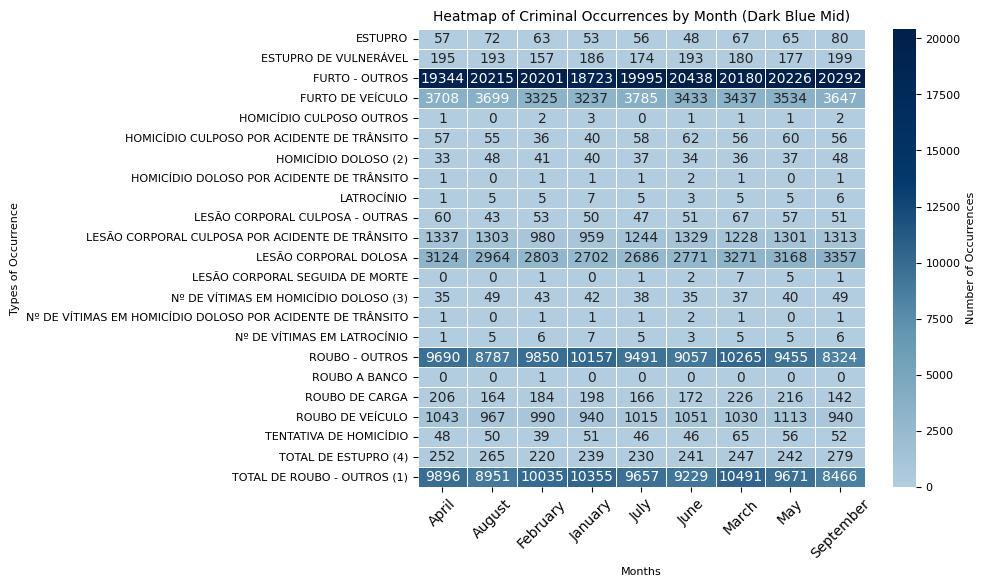

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Garantir pasta de saída ---
os.makedirs("figs_eps", exist_ok=True)

# --- Configuração padrão ---
plt.rcParams.update({
    'axes.titlesize': 10,
    'axes.labelsize': 8,
    'xtick.labelsize': 10,
    'ytick.labelsize': 8
})

# --- Carregar dados ---
caminho_ocorrencias = '/content/drive/MyDrive/Colab/secseg/OcorrenciaMensal(Criminal)-São Paulo_20241008_171533.csv'
df_ocorrencias = pd.read_csv(caminho_ocorrencias, delimiter=';')

# --- Tradução de meses ---
meses_portugues = ['Janeiro', 'Fevereiro', 'Marco', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro']
meses_ingles = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']
df_ocorrencias.rename(columns=dict(zip(meses_portugues, meses_ingles)), inplace=True)
df_ocorrencias[meses_ingles] = df_ocorrencias[meses_ingles].apply(pd.to_numeric, errors='coerce')

# --- Transformar para formato heatmap ---
df_melted = df_ocorrencias.melt(
    id_vars='Natureza',
    value_vars=meses_ingles,
    var_name='Month',
    value_name='Quantity'
)
df_heatmap = pd.pivot_table(
    df_melted,
    values='Quantity',
    index='Natureza',
    columns='Month',
    aggfunc='sum',
    fill_value=0
)

# --- Criar paleta azul com meio bem escuro ---
custom_blue_stronger_mid = LinearSegmentedColormap.from_list(
    "custom_blue_stronger_mid",
    ["#b3cde0","#6497b1", "#03396c", "#011f4b"]  # claro → meio muito escuro → quase preto-azulado
)

# --- Plot do Heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_heatmap,
    cmap=custom_blue_stronger_mid,
    annot=True,
    linewidths=0.5,
    fmt='d',
    cbar_kws={'label': 'Number of Occurrences'},
    vmin=df_heatmap.min().min(),
    vmax=df_heatmap.max().max()
)

plt.title('Heatmap of Criminal Occurrences by Month (Dark Blue Mid)')
plt.xlabel('Months')
plt.ylabel('Types of Occurrence')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# --- Salvar ---
plt.tight_layout(pad=1.2)
plt.savefig(
    "figs_eps/heatmap_criminal_occurrences_blue_darkmid.eps",
    format="eps", dpi=300, bbox_inches="tight"
)
plt.show()


# **Quais áreas da cidade são menos atendidas pelo transporte público atual**

In [ ]:
paradas_por_area = stops.groupby('stop_id').size().reset_index(name='numero_paradas')

print(paradas_por_area.sort_values('numero_paradas').head(10))


         stop_id  numero_paradas
0          18839               1
2348     3115339               2
3601     4203935               2
3999     4614924               2
5154     6415396               3
18053  710002167               4
21698  950006690               4
21697  950006689               4
8711   120015821               4
5930     7504910               4


In [ ]:
lat_bins = np.linspace(stops['stop_lat'].min(), stops['stop_lat'].max(), num=10)
lon_bins = np.linspace(stops['stop_lon'].min(), stops['stop_lon'].max(), num=10)

stops['lat_bin'] = pd.cut(stops['stop_lat'], bins=lat_bins, labels=False)
stops['lon_bin'] = pd.cut(stops['stop_lon'], bins=lon_bins, labels=False)

paradas_por_grid = stops.groupby(['lat_bin', 'lon_bin']).size().reset_index(name='numero_paradas')

print(paradas_por_grid.sort_values('numero_paradas').head())

    lat_bin  lon_bin  numero_paradas
34      6.0      5.0              25
4       1.0      4.0              50
36      8.0      1.0              50
29      5.0      7.0              50
37      8.0      2.0              50


In [ ]:
stop_times_amostragem = stop_times.sample(frac=0.001, random_state=42)
trips_amostragem = trips[['trip_id']]

paradas_trips = stop_times_amostragem.merge(trips_amostragem, on='trip_id')
print(f"Tamanho de paradas_trips após o merge: {len(paradas_trips)}")

frequencies_amostragem = frequencies[['trip_id', 'headway_secs']].sample(frac=0.001, random_state=43)
paradas_frequencia = paradas_trips.merge(frequencies_amostragem, on='trip_id')
print(f"Tamanho de paradas_frequencia após o merge: {len(paradas_frequencia)}")

stops_amostragem = stops[['stop_id', 'stop_lat', 'stop_lon']]
paradas_frequencia_final = paradas_frequencia.merge(stops_amostragem, on='stop_id')
print(f"Tamanho de paradas_frequencia_final após o merge: {len(paradas_frequencia_final)}")

print(paradas_frequencia_final[['stop_id', 'trip_id', 'headway_secs', 'stop_lat', 'stop_lon']].head())

Tamanho de paradas_trips após o merge: 61025
Tamanho de paradas_frequencia após o merge: 27450
Tamanho de paradas_frequencia_final após o merge: 686200
     stop_id    trip_id  headway_secs  stop_lat   stop_lon
0  530015289  967A-10-1           900 -23.57387 -46.655265
1  530015289  967A-10-1           900 -23.57387 -46.655265
2  530015289  967A-10-1           900 -23.57387 -46.655265
3  530015289  967A-10-1           900 -23.57387 -46.655265
4  530015289  967A-10-1           900 -23.57387 -46.655265


In [ ]:
stop_times_amostragem = stop_times.sample(frac=0.00001, random_state=43)
print(f"Tamanho da amostragem de stop_times: {len(stop_times_amostragem)}")

trip_ids_amostrados = stop_times_amostragem['trip_id'].unique()

trips_filtrados = trips[trips['trip_id'].isin(trip_ids_amostrados)]

frequencies_filtrados = frequencies[frequencies['trip_id'].isin(trip_ids_amostrados)]

paradas_frequencia = stop_times_amostragem.merge(trips_filtrados, on="trip_id", how="inner")
paradas_frequencia = paradas_frequencia.merge(frequencies_filtrados, on="trip_id", how="inner")

paradas_frequencia = paradas_frequencia.merge(
    stops[['stop_id', 'stop_lat', 'stop_lon']], on="stop_id", how="inner"
)

print(f"Colunas disponíveis após merge: {paradas_frequencia.columns}")

lat_bins = np.linspace(paradas_frequencia['stop_lat'].min(), paradas_frequencia['stop_lat'].max(), 50)
lon_bins = np.linspace(paradas_frequencia['stop_lon'].min(), paradas_frequencia['stop_lon'].max(), 50)

paradas_frequencia['lat_bin'] = pd.cut(paradas_frequencia['stop_lat'], bins=lat_bins, labels=False)
paradas_frequencia['lon_bin'] = pd.cut(paradas_frequencia['stop_lon'], bins=lon_bins, labels=False)

frequencia_por_grid = (
    paradas_frequencia.groupby(['lat_bin', 'lon_bin'])['headway_secs']
    .mean()
    .reset_index(name='frequencia_media')
)

paradas_por_grid = (
    paradas_frequencia.groupby(['lat_bin', 'lon_bin'])
    .size()
    .reset_index(name='numero_paradas')
)

grid_analise = paradas_por_grid.merge(frequencia_por_grid, on=['lat_bin', 'lon_bin'], how='left')

print(f"Tamanho do grid_analise: {len(grid_analise)}")

resultado = grid_analise.sort_values(['numero_paradas', 'frequencia_media'], ascending=[True, True])
print(resultado.head())

Tamanho da amostragem de stop_times: 24
Colunas disponíveis após merge: Index(['trip_id', 'arrival_time', 'departure_time', 'stop_id', 'stop_sequence',
       'route_id', 'service_id', 'trip_headsign', 'direction_id', 'shape_id',
       'start_time', 'end_time', 'headway_secs', 'stop_lat', 'stop_lon'],
      dtype='object')
Tamanho do grid_analise: 22
    lat_bin  lon_bin  numero_paradas  frequencia_media
6      32.0     18.0           78125       2880.000000
21     48.0     23.0           78125       2880.000000
3      25.0     14.0           78125       3600.000000
15     40.0     48.0           78125       3600.000000
17     42.0     33.0          281250       1153.333333


In [ ]:
trips_frequencies = pd.merge(trips, frequencies, on='trip_id', how='left')
trips_frequencies_amostragem = trips_frequencies.sample(frac=0.0001, random_state=44)

paradas_frequencia_amostragem = pd.merge(stop_times, trips_frequencies_amostragem, on='trip_id', how='left')
paradas_frequencia_amostragem2 = paradas_frequencia_amostragem.sample(frac=0.001, random_state=44)

paradas_completas = pd.merge(paradas_frequencia_amostragem2, stops, on='stop_id', how='left')
paradas_completas_amostragem = paradas_completas.sample(frac=0.01, random_state=44)

print(paradas_completas_amostragem.head())

         trip_id arrival_time departure_time    stop_id  stop_sequence  \
66935  2769-10-1     16:06:48       16:06:48  820012545              5   
44646  675G-10-0     07:41:24       07:41:24  230009831             28   
55591  513C-31-1     16:08:00       16:08:00  580012324              7   
68739  5123-10-0     11:37:20       11:37:20  370013695             17   
82457  2590-10-1     16:48:00       16:48:00  180005749             31   

      route_id service_id      trip_headsign  direction_id  shape_id  \
66935  2769-10        USD         Jd. Romano           1.0   71851.0   
44646  675G-10        USD    Metrô Jabaquara           0.0   71804.0   
55591      NaN        NaN                NaN           NaN       NaN   
68739  5123-10        USD    Hosp. São Paulo           0.0   82487.0   
82457  2590-10        USD  União De Vl. Nova           1.0   70094.0   

      start_time  end_time  headway_secs  \
66935   07:00:00  07:59:00        1200.0   
44646   04:00:00  04:59:00        

In [ ]:
frequencia_por_parada = paradas_completas.groupby(['stop_id', 'stop_lat', 'stop_lon']).agg({
    'headway_secs': 'mean'
}).reset_index()

frequencia_por_parada['frequencia_mins'] = frequencia_por_parada['headway_secs'] / 60

print(frequencia_por_parada.head())

   stop_id   stop_lat   stop_lon  headway_secs  frequencia_mins
0    18864 -23.533163 -46.657264           NaN              NaN
1    18866 -23.544215 -46.642461           NaN              NaN
2    18875 -23.546398 -46.607246           NaN              NaN
3    18881 -23.487111 -46.608877         120.0              2.0
4    18907 -23.677465 -46.702213         420.0              7.0


In [ ]:
import pandas as pd

stop_times_reduzido = stop_times[['stop_id']]
stops_reduzido = stops[['stop_id', 'stop_lat', 'stop_lon', 'stop_name']]

stops_reduzido['stop_lat'] = stops_reduzido['stop_lat'].round(3)
stops_reduzido['stop_lon'] = stops_reduzido['stop_lon'].round(3)

stop_times_reduzido = stop_times_reduzido.sample(frac=0.5, random_state=42)

stops_viagens = pd.merge(stop_times_reduzido, stops_reduzido, on='stop_id')

heatmap_data = stops_viagens.groupby(['stop_lat', 'stop_lon']).size().reset_index(name='quantidade_viagens')

heatmap_data = heatmap_data[heatmap_data['quantidade_viagens'] >= 10]

heatmap_data = heatmap_data.sample(frac=0.5, random_state=42)

heat_data = [[row['stop_lat'], row['stop_lon'], row['quantidade_viagens']] for _, row in heatmap_data.iterrows()]

/tmp/ipython-input-2962228942.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stops_reduzido['stop_lat'] = stops_reduzido['stop_lat'].round(3)
/tmp/ipython-input-2962228942.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stops_reduzido['stop_lon'] = stops_reduzido['stop_lon'].round(3)


In [ ]:
terminais_metro = stops[stops['stop_name'].str.contains("Terminal|Metrô", case=False, na=False)]

terminais_metro_sample = terminais_metro.sample(min(50, len(terminais_metro)), random_state=42)

In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd

mapa_sp = folium.Map(location=[-23.55052, -46.633308], zoom_start=12)

custom_gradient = {
    0.0: '#ffeda0',
    0.5: '#feb24c',
    1.0: '#f03b20'
}

HeatMap(
    heat_data,
    radius=8,
    blur=10,
    max_zoom=10,
    min_opacity=0.4,
    gradient=custom_gradient
).add_to(mapa_sp)

terminais_metro = stops[stops['stop_name'].str.contains("Terminal|Metrô", case=False, na=False)]
terminais_metro_sample = terminais_metro.sample(min(50, len(terminais_metro)), random_state=42)

for idx, row in terminais_metro_sample.iterrows():
    folium.Marker(
        location=[row['stop_lat'], row['stop_lon']],
        popup=row['stop_name'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa_sp)

mapa_sp.save('mapa_transporte_sp_com_heatmap_vermelho.html')

mapa_sp


In [ ]:
print(heatmap_data['quantidade_viagens'] <= 400)

12271    False
5551      True
5971      True
4886     False
11084    False
         ...  
14511    False
8616     False
7748     False
2210     False
5236     False
Name: quantidade_viagens, Length: 7888, dtype: bool


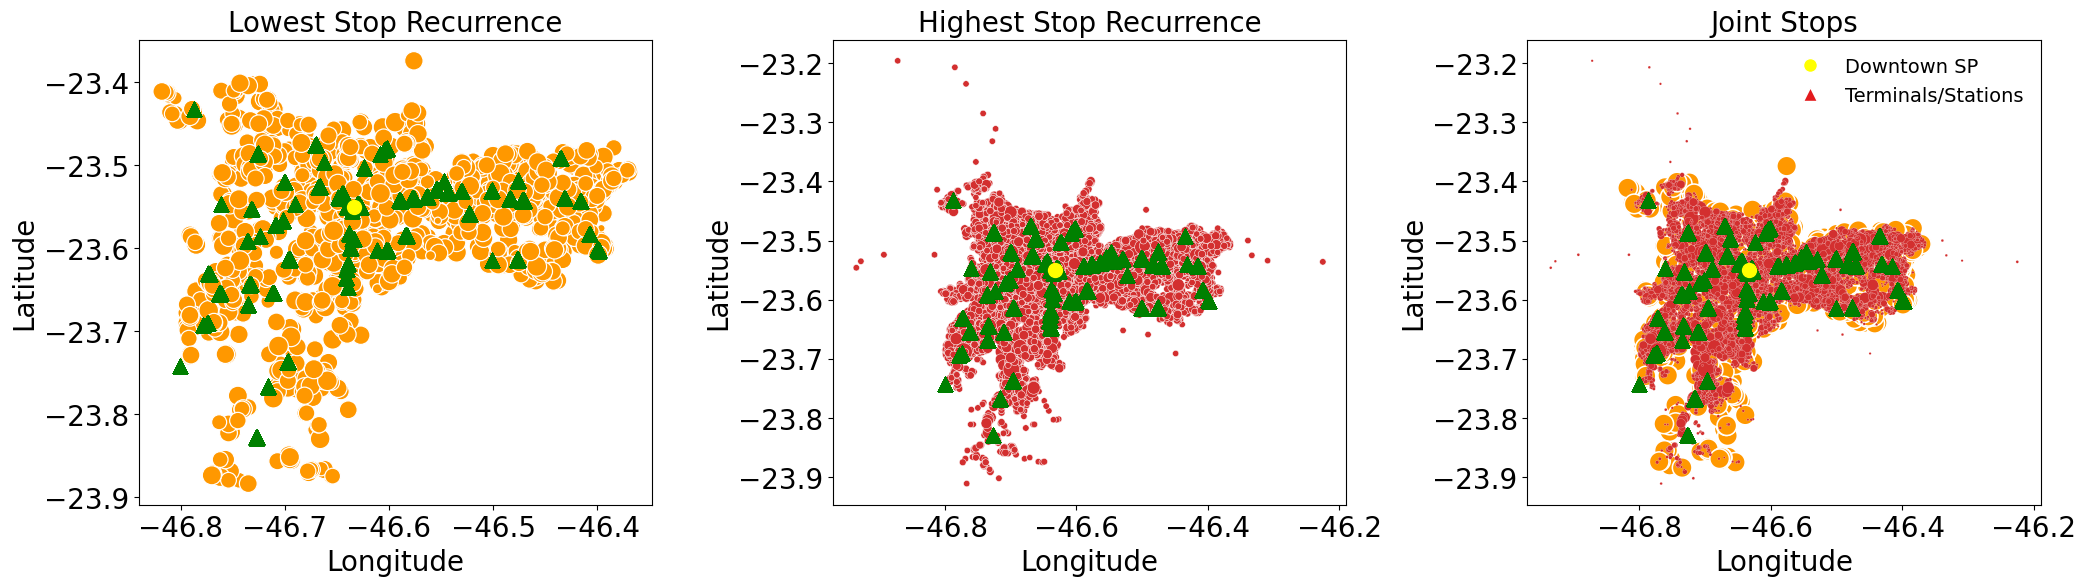

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines

# Garante pasta
os.makedirs("figs_eps", exist_ok=True)

# Fonte padrão
plt.rcParams.update({
    'axes.titlesize': 20,
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 14
})

centro_sao_paulo = [-46.6333, -23.5505]

# Separar dados
heatmap_data['number_of_trips'] = heatmap_data['quantidade_viagens']
heatmap_data_minimo_viagem = heatmap_data[heatmap_data['number_of_trips'] <= 400]
heatmap_data_viagem = heatmap_data[heatmap_data['number_of_trips'] > 400]

# Figura com 3 subplots
fig = plt.figure(figsize=(21, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])

# Legenda compartilhada
downtown = mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Downtown SP')
terminals = mlines.Line2D([0], [0], marker='^', color='w', markerfacecolor='#e31a1c', markersize=10, label='Terminals/Stations')

# Gráfico 1 - Laranja
ax0 = plt.subplot(gs[0])
sns.scatterplot(
    data=heatmap_data_minimo_viagem,
    x='stop_lon', y='stop_lat',
    size='number_of_trips',
    sizes=(20, 200),
    color='#ff9800',  # laranja
    ax=ax0,
    legend=False
)
ax0.scatter(terminais_metro['stop_lon'], terminais_metro['stop_lat'], color='green', s=100, marker='^')
ax0.scatter(centro_sao_paulo[0], centro_sao_paulo[1], color='yellow', s=100)
ax0.set_title('Lowest Stop Recurrence')
ax0.set_xlabel('Longitude')
ax0.set_ylabel('Latitude')

# Gráfico 2 - Vermelho
ax1 = plt.subplot(gs[1])
sns.scatterplot(
    data=heatmap_data_viagem,
    x='stop_lon', y='stop_lat',
    size='number_of_trips',
    sizes=(20, 200),
    color="#d32f2f",  # vermelho
    ax=ax1,
    legend=False
)
ax1.scatter(terminais_metro['stop_lon'], terminais_metro['stop_lat'], color='green', s=100, marker='^')
ax1.scatter(centro_sao_paulo[0], centro_sao_paulo[1], color='yellow', s=100)
ax1.set_title('Highest Stop Recurrence')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Gráfico 3 - Conjunto combinado
ax2 = plt.subplot(gs[2])
sns.scatterplot(
    data=heatmap_data_minimo_viagem,
    x='stop_lon', y='stop_lat',
    size='number_of_trips',
    sizes=(200, 200),
    color='#ff9800',  # laranja
    ax=ax2,
    legend=False
)
sns.scatterplot(
    data=heatmap_data_viagem,
    x='stop_lon', y='stop_lat',
    size='number_of_trips',
    sizes=(2, 200),
    color="#d32f2f",  # vermelho
    ax=ax2,
    legend=False
)
ax2.scatter(terminais_metro['stop_lon'], terminais_metro['stop_lat'], color='green', s=100, marker='^')
ax2.scatter(centro_sao_paulo[0], centro_sao_paulo[1], color='yellow', s=100)
ax2.set_title('Joint Stops')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

# Legenda única
ax2.legend(handles=[downtown, terminals], loc='upper right', frameon=False)

plt.tight_layout(pad=1.2)
plt.savefig("figs_eps/scatter_trip_stops_comparison.png", format="png", dpi=600, bbox_inches="tight")
plt.show()


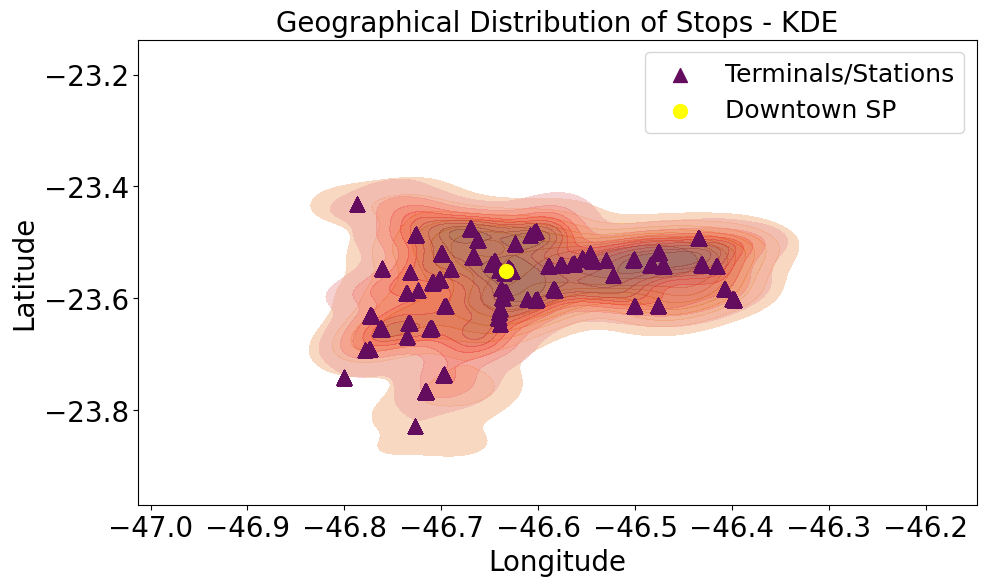

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs("figs_eps", exist_ok=True)

plt.rcParams.update({
    'axes.titlesize': 20,
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 18
})

plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=heatmap_data_minimo_viagem,
    x='stop_lon', y='stop_lat',
    fill=True, color='#ff9800', alpha=0.5, label='1 viagem'
)

sns.kdeplot(
    data=heatmap_data_viagem,
    x='stop_lon', y='stop_lat',
    fill=True, color='#d32f2f', alpha=0.5, label='Mais de 1 viagem'
)

plt.scatter(
    terminais_metro['stop_lon'], terminais_metro['stop_lat'],
    color='#640D5F', s=100, label='Terminals/Stations', marker='^'
)

plt.scatter(
    centro_sao_paulo[0], centro_sao_paulo[1],
    color='yellow', s=100, label='Downtown SP'
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Stops - KDE')

plt.legend()

plt.tight_layout(pad=1.2)
plt.savefig("figs_eps/kde_stop_distribution.eps", format="eps", dpi=300, bbox_inches="tight")
plt.show()


# **Metrics**

In [ ]:
heatmap_data.columns

Index(['stop_lat', 'stop_lon', 'quantidade_viagens', 'number_of_trips'], dtype='object')

In [ ]:
from scipy.spatial.distance import cdist
from scipy.stats import pearsonr

# Paradas únicas com suas viagens
paradas = heatmap_data[['stop_lat', 'stop_lon', 'quantidade_viagens']].drop_duplicates()
terminais = terminais_metro[['stop_lat', 'stop_lon']].dropna()

# Matriz de distância (euclidiana em coordenadas geográficas brutas)
dist_matrix = cdist(
    paradas[['stop_lat', 'stop_lon']],
    terminais[['stop_lat', 'stop_lon']],
    metric='euclidean'
)

# Menor distância de cada parada para um terminal
paradas['dist_to_terminal'] = dist_matrix.min(axis=1)

# Correlação
corr, p_val = pearsonr(paradas['dist_to_terminal'], paradas['quantidade_viagens'])

print(f"Pearson Correlation: {corr:.3f} (p={p_val:.3f})")


Pearson Correlation: -0.113 (p=0.000)


In [ ]:
from scipy.stats import ttest_ind

# Usar mediana como limite entre próximo vs longe
limite = paradas['dist_to_terminal'].median()

grupo_proximo = paradas[paradas['dist_to_terminal'] <= limite]['quantidade_viagens']
grupo_longe = paradas[paradas['dist_to_terminal'] > limite]['quantidade_viagens']

# Teste t de Student (independente, duas caudas)
t_stat, p_val = ttest_ind(grupo_proximo, grupo_longe, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3e}")

# Média de cada grupo (para contexto)
print(f"Média (próximo): {grupo_proximo.mean():.2f}")
print(f"Média (longe):   {grupo_longe.mean():.2f}")


T-statistic: 5.565
P-value: 2.708e-08
Média (próximo): 2114.91
Média (longe):   1835.49


In [ ]:
import statsmodels.api as sm

# Dados
X = paradas['dist_to_terminal']
y = paradas['quantidade_viagens']

# Adiciona intercepto (β0)
X_const = sm.add_constant(X)

# Ajusta o modelo
modelo = sm.OLS(y, X_const).fit()

# Sumário completo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:     quantidade_viagens   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     101.3
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           1.10e-23
Time:                        19:22:27   Log-Likelihood:                -71970.
No. Observations:                7888   AIC:                         1.439e+05
Df Residuals:                    7886   BIC:                         1.440e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2325.8052     42.874  